In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

/tmp/ipykernel_327034/1845181667.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


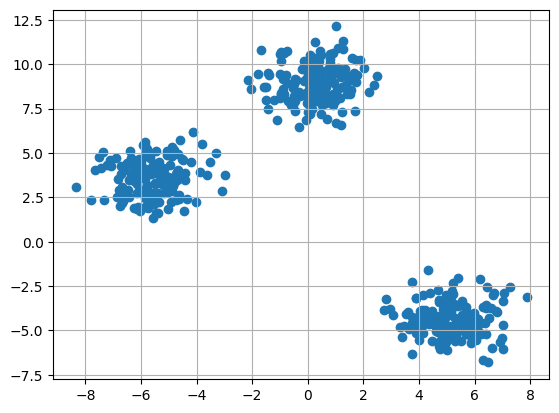

In [53]:
    X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

    figure = plt.figure(0)
    plt.grid(True)
    plt.scatter(X[:,0],X[:,1])
    figure.show()

In [37]:
k = 3
clusters = {}
np.random.seed(20)

for index in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center':center,
        'points':points
    }
    clusters[index] = cluster

print(clusters)
print(clusters[0]['center'])
print(k)
for i in range(k):
    center = clusters[i]['center']
    print(center)

{0: {'center': array([1.76261602, 7.95427456]), 'points': []}, 1: {'center': array([7.83061459, 6.31674955]), 'points': []}, 2: {'center': array([-9.28220829,  3.83515164]), 'points': []}}
[1.76261602 7.95427456]
3
[1.76261602 7.95427456]
[7.83061459 6.31674955]
[-9.28220829  3.83515164]


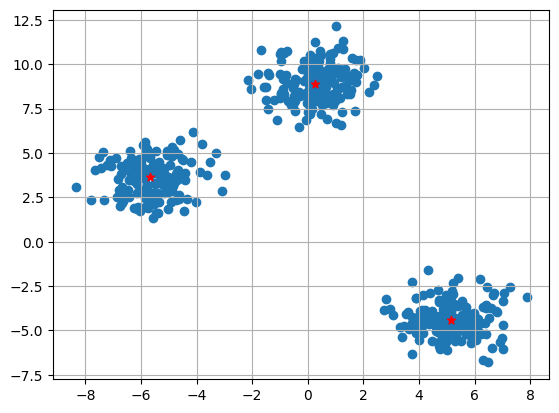

In [49]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in range(k):
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [39]:
print(clusters)

{0: {'center': array([1.76261602, 7.95427456]), 'points': []}, 1: {'center': array([7.83061459, 6.31674955]), 'points': []}, 2: {'center': array([-9.28220829,  3.83515164]), 'points': []}}


In [40]:
def dist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [28]:
def assignPointsToClusters(X, clusters):
    for ix in range(X.shape[0]):
        dists = []
        curr_x = X[ix]

        for kx in range(k):
            d = dist(curr_x,clusters[kx]['center'])
            dists.append(d)

        current_cluster = np.argmin(dists)
        clusters[current_cluster]['points'].append(curr_x)

In [29]:
def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            new_mean = pts.mean(axis = 0)
            clusters[kx]['center'] = new_mean
            clusters[kx]['points'] = pts

In [41]:
assignPointsToClusters(X,clusters)
updateClusters(clusters)

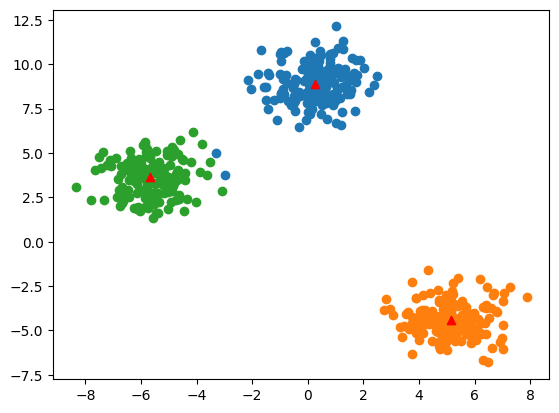

In [51]:
# plt.scatter(X[:,0],X[:,1])
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(clusters[i]['points'][:,0],clusters[i]['points'][:,1])
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
    # print(clusters[i]['point'])
plt.show()